<h1><center>Drug Consumption </center></h1>
<h2><center> by Janany and Ilies</center></h2>

## Table of contents

* [Problem](#Problem)

* [1. Data pre processing](#1.Data-pre-processing)
    * [Loading](#Loading)
    * [Encoding](#Encoding)
    * [Normalization](#Normalization)
    * [Imputation](#Imputation) 
    
* [2. Data visualization](#2.Data-visualization)
    * [Demographic features analysis](#Demographic-features-analysis)
    * [Personality features analysis](#Personality-features-analysis)
    * [Drugs analysis](#Drugs-analysis)

* [3. Modeling](#3.Modeling)
    * [Algorithms](#Algorithms)
    * [Hyper parameters](#Hyper-parameters)
    * [Grid search](#Grid-search)
    * [Comparaison](#Comparaison)

* [Conclusion](#Conclusion)
* [References](#References)

Drug consumption (quantified) Data Set is a multilabel dataset from the UCI machine learning repository.

To summarize, the features are 5 demographic columns and 7 personality traits. The target is the drug used, 18 in total, with their usage frequency.

You can see the dataset description [here](http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29) for more details.

## Problem

+ Based on some general information and a personality test about you, can we predict if you are a drug consumer ? If yes, which drugs ? <br> 
+ For further : Is there some features more relevant than the other ? Do we have to make specific group of drugs to have better result ?
<br>
<br>
To answer those questions we will pre process the data, visualize the proportion of each data in order to understand them better, then see potential correlations. Finaly, we will choose the best model to predict our drug.

## 1.Data pre processing

### Loading

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [2]:
df =  pd.read_csv('drug_consumption.data', header=None, sep="," ,index_col=0)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
pd.set_option('display.max_columns', None)
df.columns = ["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl",  "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crake", "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nictotine", "Semer", "VSA"]
df.index.name = 'ID'
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Canabis,Choc,Coke,Crake,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nictotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
df.shape

(1885, 31)

Semeron is a fake drug to verify reliability of answers, for the purpose of this analysis we need to supprimer ce truc.

In [5]:
semerons = df[df['Semer'] != 'CL0']
semerons

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Canabis,Choc,Coke,Crake,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nictotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,0.12331,1.29221,0.76540,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,-0.00665,1.29221,1.92173,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,-0.52745,0.52975,1.22470,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,0.12331,0.88113,1.92173,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,-0.00665,0.88113,0.07987,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


There are 8 people that lied about taking Semeron, which is a fake drug, so we should remove them.

In [6]:
df = df[df['Semer'] == 'CL0']
df = df.drop(columns='Semer')
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Canabis,Choc,Coke,Crake,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nictotine,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0


We specify in groups the columns that we are going to analyse

In [7]:
feature_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

personality_columns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

demographic_columns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']

drugs_columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Canabis', 'Choc',
    'Coke', 'Crake', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
    'Mushrooms', 'Nictotine', 'VSA']

drugs_legal = ['Alcohol', 'Caff', 'Choc', 'Nictotine']

drugs_illegal = [drug for drug in drugs_columns if drug not in drugs_legal]

### Encoding

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 1 to 1888
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1877 non-null   float64
 1   Gender     1877 non-null   float64
 2   Education  1877 non-null   float64
 3   Country    1877 non-null   float64
 4   Ethnicity  1877 non-null   float64
 5   Nscore     1877 non-null   float64
 6   Escore     1877 non-null   float64
 7   Oscore     1877 non-null   float64
 8   Ascore     1877 non-null   float64
 9   Cscore     1877 non-null   float64
 10  Impulsive  1877 non-null   float64
 11  SS         1877 non-null   float64
 12  Alcohol    1877 non-null   object 
 13  Amphet     1877 non-null   object 
 14  Amyl       1877 non-null   object 
 15  Benzos     1877 non-null   object 
 16  Caff       1877 non-null   object 
 17  Canabis    1877 non-null   object 
 18  Choc       1877 non-null   object 
 19  Coke       1877 non-null   object 
 20  Crake   

We can see here that the drugs columns are in object type, we have to convert those categorical data into integer.

In [9]:
for i in drugs_columns:
    df[i] = df[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1877 entries, 1 to 1888
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1877 non-null   float64
 1   Gender     1877 non-null   float64
 2   Education  1877 non-null   float64
 3   Country    1877 non-null   float64
 4   Ethnicity  1877 non-null   float64
 5   Nscore     1877 non-null   float64
 6   Escore     1877 non-null   float64
 7   Oscore     1877 non-null   float64
 8   Ascore     1877 non-null   float64
 9   Cscore     1877 non-null   float64
 10  Impulsive  1877 non-null   float64
 11  SS         1877 non-null   float64
 12  Alcohol    1877 non-null   int64  
 13  Amphet     1877 non-null   int64  
 14  Amyl       1877 non-null   int64  
 15  Benzos     1877 non-null   int64  
 16  Caff       1877 non-null   int64  
 17  Canabis    1877 non-null   int64  
 18  Choc       1877 non-null   int64  
 19  Coke       1877 non-null   int64  
 20  Crake   

### Normalization

In [11]:
df.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Canabis,Choc,Coke,Crake,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nictotine,VSA
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,1.337773,0.606819,1.461907,5.484283,2.980288,5.109750,1.156633,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.429409
std,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,1.782384,1.064005,1.869193,1.115119,2.286778,1.085716,1.510791,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.959160
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


We can see here that the values are already normalized.

### Imputation

In [12]:
df.isna().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Canabis      0
Choc         0
Coke         0
Crake        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nictotine    0
VSA          0
dtype: int64

There is no missing data in this dataset.

## 2.Data-visualization

Here is a summary of all the data

<AxesSubplot:>

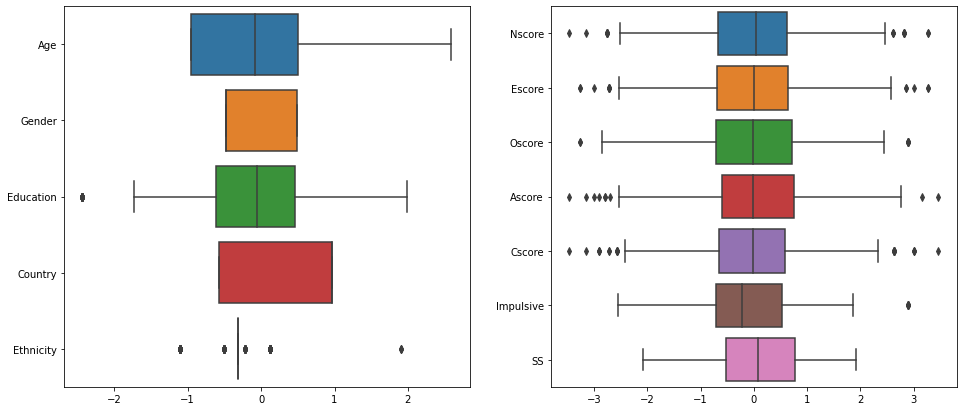

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(16,7))
sns.boxplot(data = df[demographic_columns], ax=axs[0], orient="h")
sns.boxplot(data = df[personality_columns], ax=axs[1], orient="h")

We can see that the values are centered features around 0 and have a small range for the features, thats why we didnt scale or center the data.

Interpretation : the personality traits are symetrical, the ouliers are not incorrectly entered or measured data so we keep them, may be that a non-linear model fits better ?

We have two type variables : demographic information and personality traits.
<br>
To begin, we will see the population of the variables in those two groups.

### Demographic features analysis

##### Proportion

In [14]:
plotdf = df.copy()

In [15]:
labels = {-0.09765:'Australia', 0.24923:'Canada', -0.46841:'New Zealand', -0.28519:'Other', 0.21128:'Republic of Ireland', 0.96082:'UK', -0.57009:'USA'}
plotdf['Country'] = plotdf['Country'].map(labels)
labels1 = {-0.50212:'Asian',-1.10702:'Black', 1.90725:'Mixed-Black/Asian', 0.12600:'Mixed-White/Asian', -0.22166:'Mixed-White/Black', 0.11440:'Other', -0.31685:'White'}
plotdf['Ethnicity'] = plotdf['Ethnicity'].map(labels1)
labels2 = {-0.48246:'Male',0.48246:'Female'}
plotdf['Gender'] = plotdf['Gender'].map(labels2)
labels3 = {-0.95197:'18 - 24',-0.07854:'25 - 34', 0.49788:'35 - 44', 1.09449:'45 - 54', 1.82213:'55 - 64', 2.59171:'65+'}
plotdf['Age'] = plotdf['Age'].map(labels3)
labels4 = {-2.43591:'Left school < 16',-1.73790:'Left school at 16', -1.43719:'Left school at 17', -1.22751:'Left school at 18', -0.61113:'University no degree', 
           -0.05921:'Professional diploma', 0.45468:'University degree', 1.16365:'Masters degree', 1.98437:'Doctorate degree'}
plotdf['Education'] = plotdf['Education'].map(labels4)

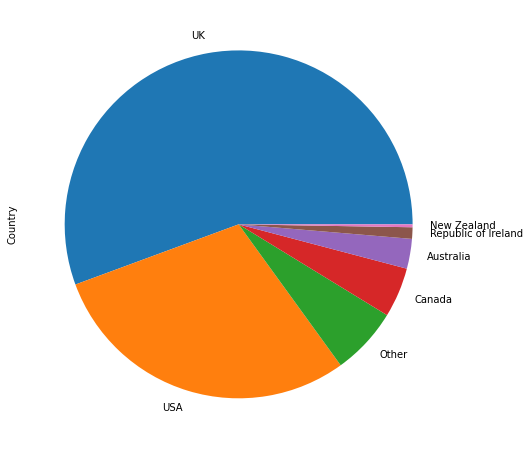

In [16]:
countries = plotdf['Country'].value_counts().plot(kind='pie', figsize=(8, 8))

All the known countries (90+%) are English speaking with US and UK totalling to over 80% of the data.

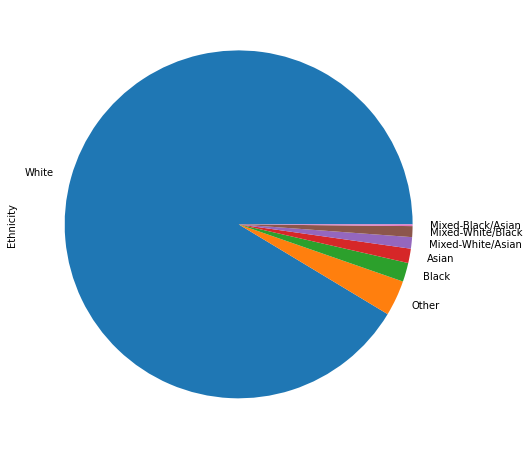

In [17]:
ethnicity = plotdf['Ethnicity'].value_counts().plot(kind='pie', figsize=(8, 8))

This is a clear unbalance and isn't representative. 90+% of respondents are white. Again, a clear unbalance and is not representative.

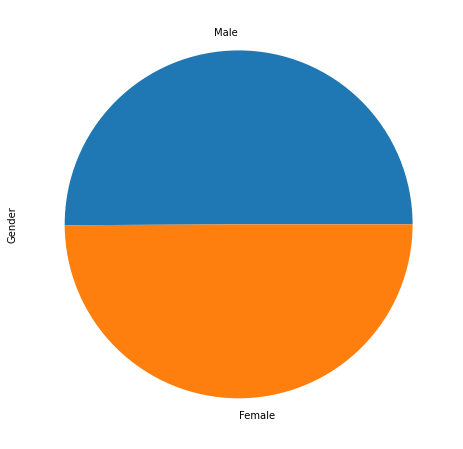

In [18]:
gender = plotdf['Gender'].value_counts().plot(kind='pie', figsize=(8, 8))

 Gender is balanced and representative.

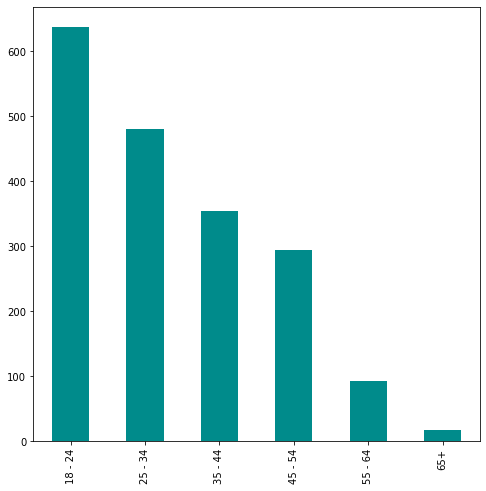

In [17]:
age = plotdf['Age'].value_counts().plot(kind='bar', figsize=(8, 8), color=['darkcyan'])

The age groups are intervals of around 10 years. As we can see, the older the age group, the less represented they are. The 18-24 group holds around 1/3 of all respondents !

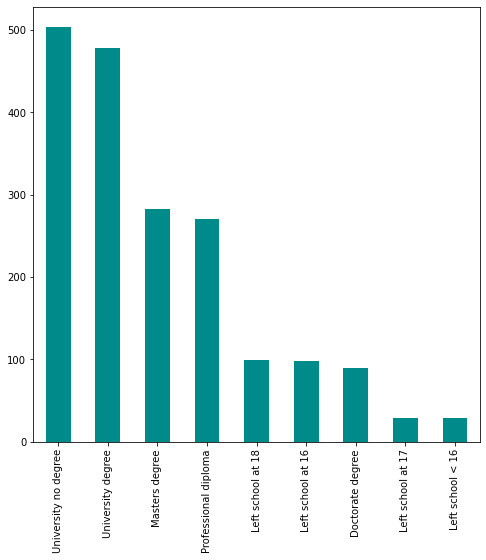

In [18]:
education = plotdf['Education'].value_counts().plot(kind='bar', figsize=(8, 8), color=['darkcyan'])

There is a predomination of educated people (around 85% are of college or above level), causing an unbalance.

Interpretation : We can see some features are pretty balanced but in some cases, classes are underrepresented. + ????????????

##### Correlation

+ correlation between them

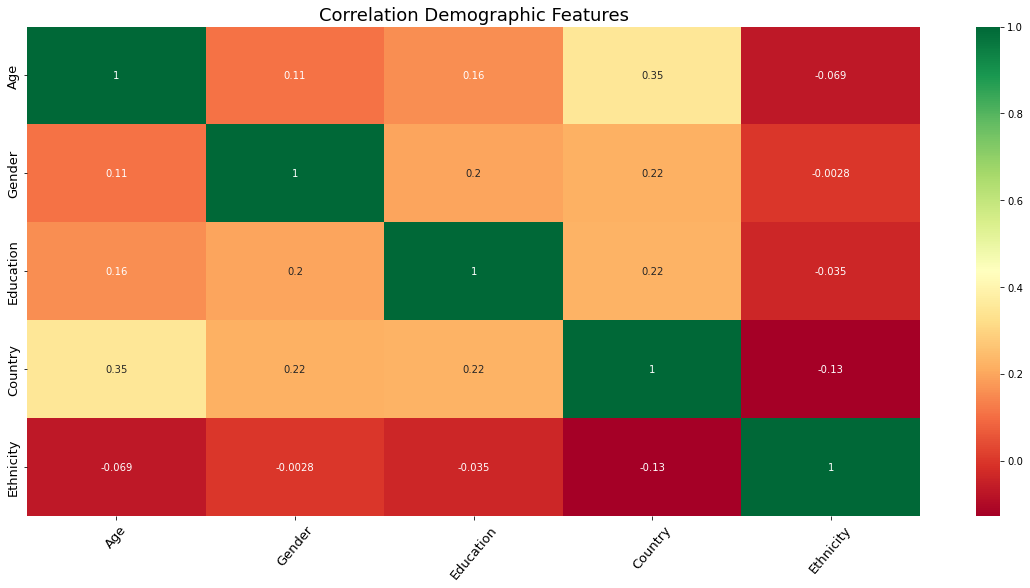

In [19]:
df_demo = df[demographic_columns]

corrmat = df_demo.corr()

plt.figure(figsize=(20,9))

hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df_demo.columns, 
                 xticklabels = df_demo.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation Demographic Features",fontsize=18)
plt.show()

Only very weak statistically significant correlations at most.

The very weak correlations we can keep in mind are the following:

Age / Education (makes sense since basically no 18-24 would have a doctorate degree for example)
Gender / Education (males and females may have slightly different aims and standards regarding education)
Education / Country (for social tendencies, country development and other reasons, the education and country may be correlated but since the country here are very similar, the relationship is very weak)

+ corretlation with drugs

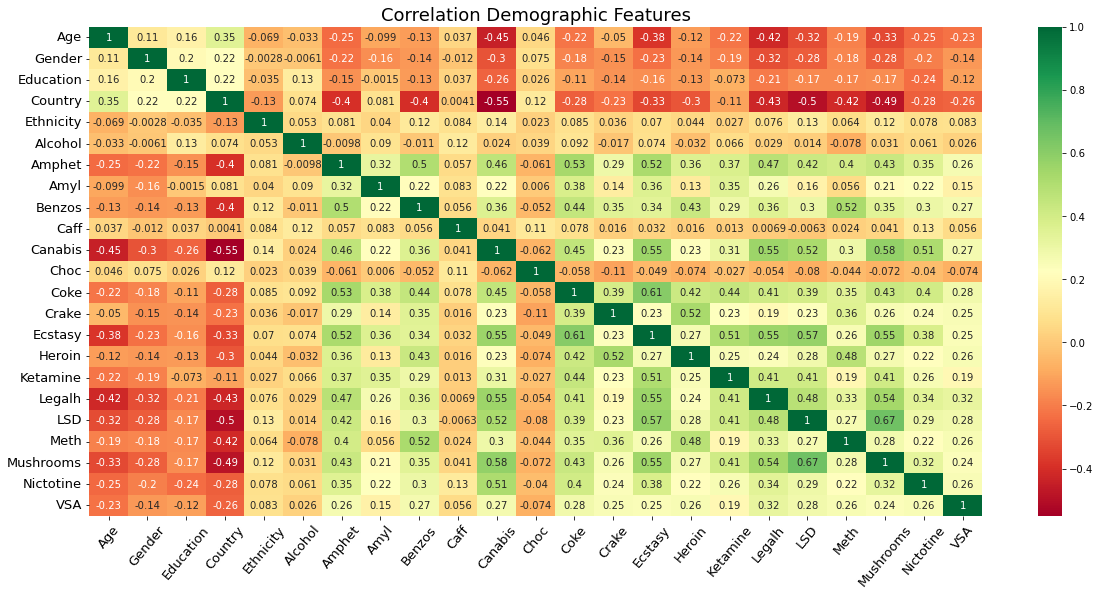

In [22]:
demodrug  = demographic_columns+drugs_columns
df_demodrug = df[demodrug]

corrmat = df_demodrug.corr()

plt.figure(figsize=(20,9))

hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df_demodrug.columns, 
                 xticklabels = df_demodrug.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation Demographic Features",fontsize=18)
plt.show()

Interpretation: we see that the country has an influence on consumption because the legislation (concerning cannabis for example) and customs are different. It is observed that legal drugs (alcohol for example) have no correlation with any parameter, it would perhaps be wise to distinguish between legal and illegal drugs.

### Personality features analysis

##### Proportion

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, '')]]

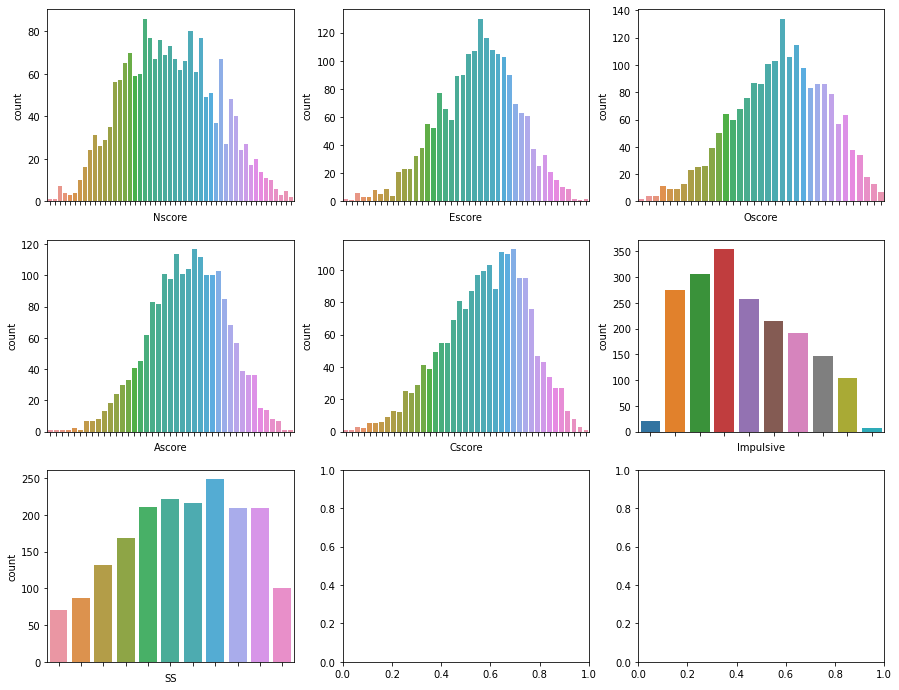

In [23]:
fig, axs = plt.subplots(nrows=3,ncols=3, figsize=(15,12))

sns.countplot(x='Nscore', data=plotdf, ax=axs[0,0]).set(xticklabels=[])
sns.countplot(x='Escore', data=plotdf, ax=axs[0,1]).set(xticklabels=[])
sns.countplot(x='Oscore', data=plotdf, ax=axs[0,2]).set(xticklabels=[])
sns.countplot(x='Ascore', data=plotdf, ax=axs[1,0]).set(xticklabels=[])
sns.countplot(x='Cscore', data=plotdf, ax=axs[1,1]).set(xticklabels=[])
sns.countplot(x='Impulsive', data=plotdf, ax=axs[1,2]).set(xticklabels=[])
sns.countplot(x='SS', data=plotdf, ax=axs[2,0]).set(xticklabels=[])

Hard to interpret since there are many levels for some personality traits and they are encoded as hardly interpretable real values, even though they are sorted in the same order as the original values, which aren't really interpretable either.

##### Correlation

+ correlation between them

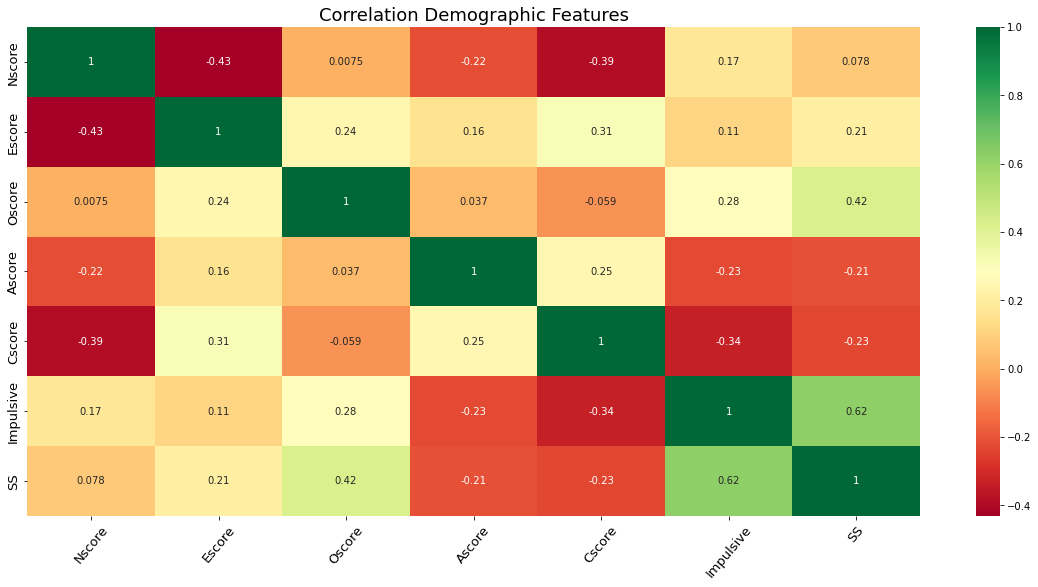

In [24]:
df_perso = df[personality_columns]

corrmat = df_perso.corr()

plt.figure(figsize=(20,9))

hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df_perso.columns, 
                 xticklabels = df_perso.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation Demographic Features",fontsize=18)
plt.show()

Interpretation: The E score has the most correlation.

+ correlation with drugs

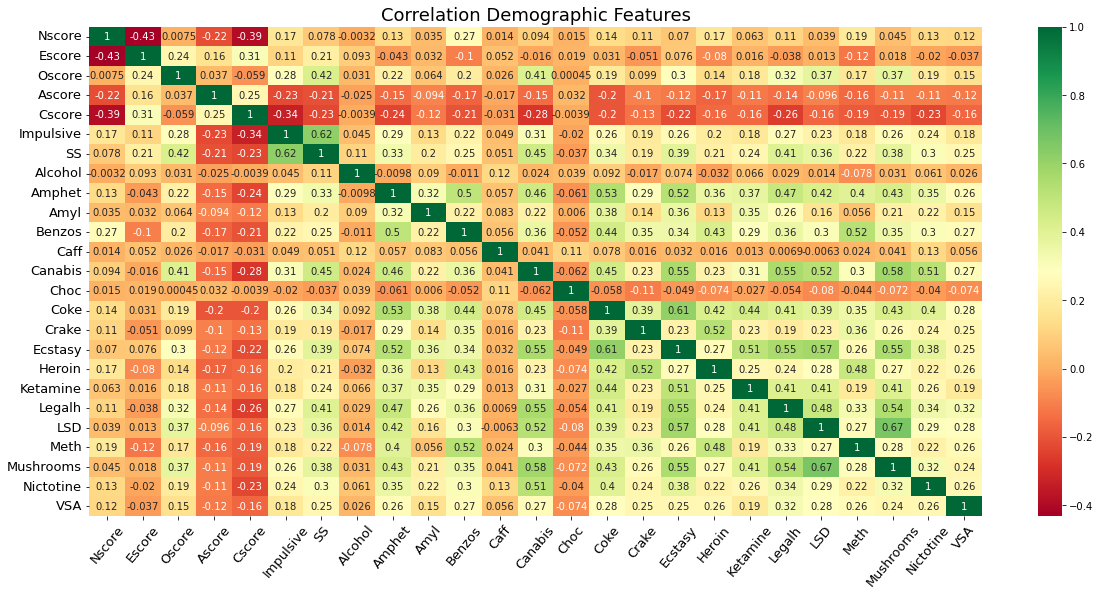

In [25]:
persodrug  = personality_columns+drugs_columns
df_persodrug = df[persodrug]

corrmat = df_persodrug.corr()

plt.figure(figsize=(20,9))

hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df_persodrug.columns, 
                 xticklabels = df_persodrug.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation Demographic Features",fontsize=18)
plt.show()

### Drugs

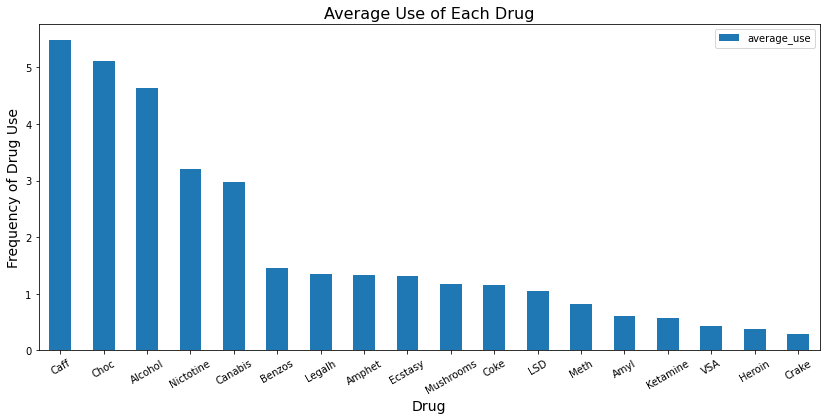

In [29]:
drug_mean = []
for column in drugs_columns:
    mean = df[column].mean()
    drug_mean.append(mean)
    
drug_dic = {'drug': drugs_columns,
            'average_use': drug_mean}
drug_use = pd.DataFrame.from_dict(drug_dic)
drug_use = drug_use.sort_values(['average_use'], ascending=False)

drug_use.plot(kind='bar', x='drug', y='average_use', figsize=(14, 6))
plt.title('Average Use of Each Drug', size=16)
plt.xlabel('Drug', size=14)
plt.xticks(rotation=30)
plt.ylabel('Frequency of Drug Use', size=14)
plt.show()

Interpretation: we can clearly see the distinction between legal and illegal drugs.

In [30]:
cp = ['User_Alcohol','User_Amphet', 'User_Amyl', 'User_Benzos', 'User_Caff', 'User_Cannabis', 'User_Choc', 'User_Coke', 'User_Crack',
           'User_Ecstasy', 'User_Heroin', 'User_Ketamine', 'User_Legalh', 'User_LSD', 'User_Meth', 'User_Mushrooms','User_Nicotine', 'User_Semer', 'User_VSA']

In [31]:
for i in range(len(drugs)):
    df.loc[((df[drugs[i]]==0) | (df[drugs[i]]==1)),cp[i]] = 'Non-user'
    df.loc[((df[drugs[i]]==2) | (df[drugs[i]]==3) | (df[drugs[i]]==4) | (df[drugs[i]]==5) | (df[drugs[i]]==6)),cp[i]] = 'User'

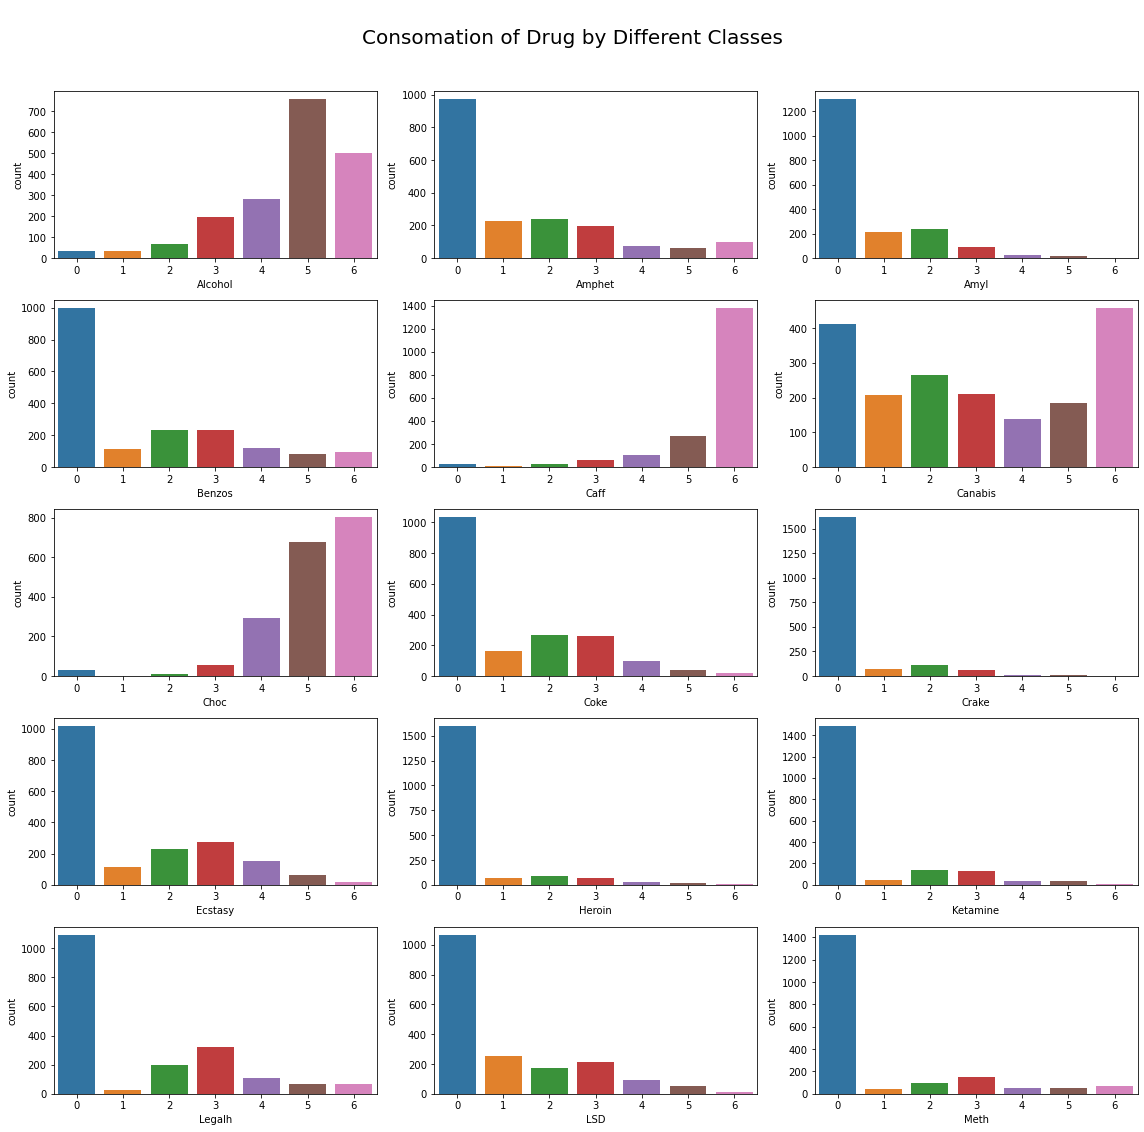

In [34]:
fig, axes = plt.subplots(5,3,figsize = (16,16))
fig.suptitle("\nConsomation of Drug by Different Classes\n\n",fontsize=20)
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=drugs[k], data=df,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

Interpretation: Legal drugs are consumed in droves.

We notice that the most used illegal drugs are used more often (see graph above).

In [35]:
count_of_users = []
count_of_non_users = []

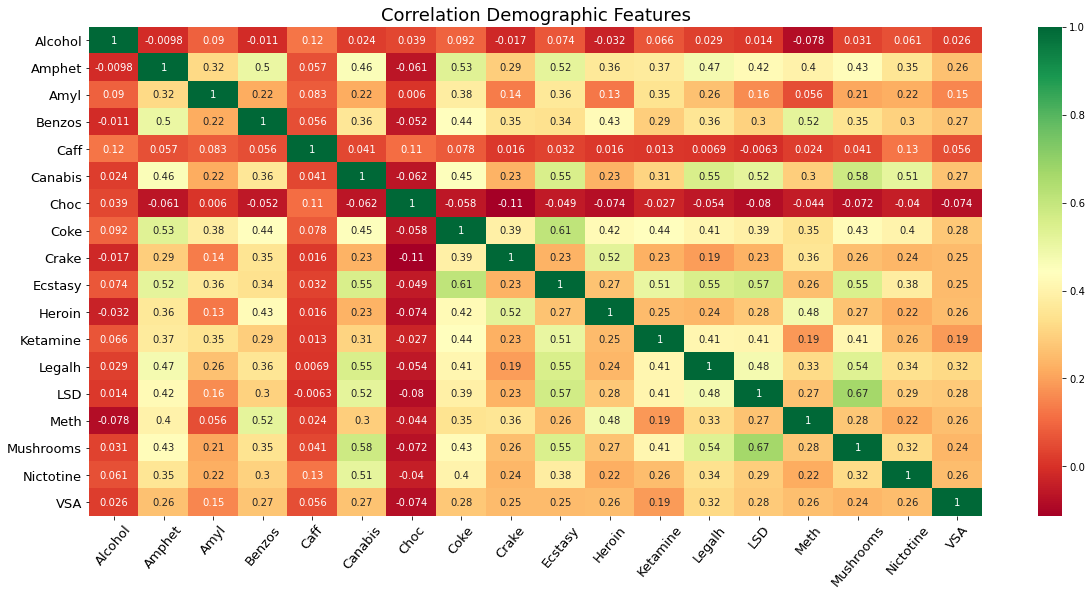

In [34]:
df_drugs = df[drugs]

corrmat = df_drugs.corr()

plt.figure(figsize=(20,9))

hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = df_drugs.columns, 
                 xticklabels = df_drugs.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation Demographic Features",fontsize=18)
plt.show()

## 3.Modeling 

In [ ]:
df.shape

### Definition of the problem : Determinate a drug user depending his personality 

The aim of this study is to determine possible correlations between origin, age and the 5 personality traits. It is a binary classification problem: Drug user/Non user.     
The frequency of use of each drug is scaled from 0 (non-user) to 6 (used last day). In order to build our model, we had to define a drug user. Indeed, a person who used drugs last decade cannot be in the same category as someone who used drugs yesterday. We therefore decided to consider all people who had used drugs in the last year up to yesterday as drug users, represented by 1 in the dataframe and 0 on the contrary.

We will consider a drug user to be anyone who uses illegal drugs, as so-called legal drugs are used by the vast majority of the population. 

In [ ]:
df

In [35]:
df_ml=df

In [36]:
df_ml=df_ml.drop(drugs_legal,axis=1)

In [37]:
df_ml

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Canabis,Coke,Crake,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,User_Alcohol,User_Amphet,User_Amyl,User_Benzos,User_Caff,User_Cannabis,User_Choc,User_Coke,User_Crack,User_Ecstasy,User_Heroin,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,2,0,2,0,0,0,0,0,0,0,0,0,0,0,User,User,Non-user,User,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2,2,0,4,3,0,4,0,2,0,2,3,0,0,User,User,User,Non-user,User,User,User,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,3,0,0,0,0,0,0,0,0,1,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,3,2,2,0,0,0,2,0,0,0,0,0,User,Non-user,Non-user,User,User,User,User,User,Non-user,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0,3,0,0,1,0,0,1,0,0,2,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,0,5,0,0,0,0,0,3,3,0,0,5,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user,Non-user,User
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,3,0,0,2,0,0,3,5,4,4,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,User,Non-user,Non-user,User,User,User,User,User,Non-user
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,6,5,5,6,4,0,4,0,2,0,2,0,2,0,User,User,User,User,User,User,User,User,Non-user,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user


In [38]:
drug_user_dict={0:0,1:0,2:0,3:1,4:1,5:1,6:1}

In [39]:
for col in drugs_illegal:
    df_ml[col]=df_ml[col].map(drug_user_dict)
df_ml

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Canabis,Coke,Crake,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,User_Alcohol,User_Amphet,User_Amyl,User_Benzos,User_Caff,User_Cannabis,User_Choc,User_Coke,User_Crack,User_Ecstasy,User_Heroin,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,User,User,Non-user,User,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,1,1,0,1,0,0,0,0,1,0,0,User,User,User,Non-user,User,User,User,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,0,0,0,0,0,0,0,0,0,0,0,User,Non-user,Non-user,User,User,User,User,User,Non-user,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,1,0,0,0,0,0,0,0,0,0,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,0,1,0,0,0,0,0,1,1,0,0,1,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user,Non-user,User
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,1,0,0,0,0,0,1,1,1,1,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,User,Non-user,Non-user,User,User,User,User,User,Non-user
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,1,1,1,1,0,1,0,0,0,0,0,0,0,User,User,User,User,User,User,User,User,Non-user,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user


In [61]:
df_ml['Drug_user']=np.where(df_ml.loc[:,drugs_illegal].sum(axis=1)>0, 1, 0)

In [62]:
df_ml['Drug_user'].sum()

1171

In [41]:
df_ml

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Canabis,Coke,Crake,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,User_Alcohol,User_Amphet,User_Amyl,User_Benzos,User_Caff,User_Cannabis,User_Choc,User_Coke,User_Crack,User_Ecstasy,User_Heroin,User_Ketamine,User_Legalh,User_LSD,User_Meth,User_Mushrooms,User_Nicotine,User_Semer,Drug_user
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,User,User,Non-user,User,User,Non-user,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,1,1,0,1,0,0,0,0,1,0,0,User,User,User,Non-user,User,User,User,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user,1
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,1
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,0,0,0,0,0,0,0,0,0,0,0,User,Non-user,Non-user,User,User,User,User,User,Non-user,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,1
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,1,0,0,0,0,0,0,0,0,0,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,0,1,0,0,0,0,0,1,1,0,0,1,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user,Non-user,User,1
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,1,0,0,0,0,0,1,1,1,1,0,User,Non-user,Non-user,Non-user,User,User,User,Non-user,Non-user,User,Non-user,Non-user,User,User,User,User,User,Non-user,1
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,1,1,1,1,0,1,0,0,0,0,0,0,0,User,User,User,User,User,User,User,User,Non-user,User,Non-user,User,Non-user,User,Non-user,User,User,Non-user,1


### Feature Engineering 

In [42]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score


from sklearn.metrics import classification_report

In [43]:
def preprocessing_inputs(df, target_column):
   
    
    # Split df into X and y
    y = df[target_column]
    
    features=['Age', 'Gender', 'Education', 'Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
    X=df_ml.loc[:,features]
    
    
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    
    X_train = pd.DataFrame(X_train, 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(X_test, 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

### Function to Evaluate our Models 

In [44]:
def plot_confusion_matrix(y_test,yhat):
    
    ax=None    
    ax= plt.subplot()
    cm=confusion_matrix(y_test,yhat)
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

        #Metrics for Binary Confusion Matrices

    accuracy = accuracy_score(y_test, yhat)
    precision = precision_score(y_test,yhat)
    recall    = recall_score(y_test,yhat)
    f1score  = f1_score(y_test, yhat,average="weighted", pos_label=1)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)

    plt.xlabel('Predicted label' + stats_text)

    plt.show()

In [45]:
X_train, X_test, y_train, y_test = preprocessing_inputs(df_ml, 'Drug_user')

### Algorithms

As this is a binary classification problem, we have chosen 5 algorithms that perform well for this type of modelling:

- Logistic Regression
- Support Vector Machines
- Random Forest Classifier
- KNN Classifier Add an explanation for each model ?

In [46]:
models = {
            '     Logisitc Regression': LogisticRegression(),
            
            ' Support Vector Machines': SVC(),
            'Random Forest Classifier': RandomForestClassifier(),
            '          KNN Classifier':KNeighborsClassifier(),
}

In [47]:
for name, model in models.items():
    model=model.fit(X_train, y_train)
    print(name + ' trained.')

     Logisitc Regression trained.
 Support Vector Machines trained.
Random Forest Classifier trained.
          KNN Classifier trained.


In [58]:
modeltest=LogisticRegression().fit(X_train,y_train)
yhat=modeltest.predict_proba(X_test)

In [59]:
yhat

array([[0.01320894, 0.98679106],
       [0.61107354, 0.38892646],
       [0.84385831, 0.15614169],
       [0.01427728, 0.98572272],
       [0.69133176, 0.30866824],
       [0.46716918, 0.53283082],
       [0.23603476, 0.76396524],
       [0.86236071, 0.13763929],
       [0.38559308, 0.61440692],
       [0.03652333, 0.96347667],
       [0.82831031, 0.17168969],
       [0.21766618, 0.78233382],
       [0.25106484, 0.74893516],
       [0.23351697, 0.76648303],
       [0.87068458, 0.12931542],
       [0.87328046, 0.12671954],
       [0.05954942, 0.94045058],
       [0.57260192, 0.42739808],
       [0.23897087, 0.76102913],
       [0.85792658, 0.14207342],
       [0.09441147, 0.90558853],
       [0.89478128, 0.10521872],
       [0.84050813, 0.15949187],
       [0.89179465, 0.10820535],
       [0.03237569, 0.96762431],
       [0.98869425, 0.01130575],
       [0.63354572, 0.36645428],
       [0.42829049, 0.57170951],
       [0.04874945, 0.95125055],
       [0.62221277, 0.37778723],
       [0.

In [60]:
modeltest=LogisticRegression().fit(X_train,y_train)
yhat=modeltest.predict(X_test)
yhat

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,

#### Metrics

Our models are trained, we are going to use different metrics from the scikit learn library, in order to compare the models and chose the best one. 
- Accuracy :  a ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. Yes, accuracy is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same.

          Accuracy = TP+TN/TP+FP+FN+TN

- Precision : the ratio of correctly predicted positive observations to the total predicted positive observations

         Precision = TP/TP+FP

- Recall :  Recall is the ratio of correctly predicted positive observations to the all observations in actual class

         Recall = TP/TP+FN

- F1 score : F1 Score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution.

        F1 Score = 2*(Recall * Precision) / (Recall + Precision)


In [48]:
df_ml.to_csv("drug_consumption_ml.csv")

In [49]:
df_ml['Drug_user'].sum()


1171

#### Model predictions and score

In [50]:
print('                  ACCURACY')
for name, model in models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    

    
    print(name + ' Accuracy: {:.2%}'.format(acc))
    #plot_confusion_matrix(y_test,yhat)
    
print('---------------------------------------------')
print('                  F1 SCORES')
for name, model in models.items():
    yhat = model.predict(X_test)
    f1 = f1_score(y_test, yhat,average="weighted", pos_label=1)
    print(name + ' F1-Score: {:.5}'.format(f1))

                  ACCURACY
     Logisitc Regression Accuracy: 82.98%
 Support Vector Machines Accuracy: 83.78%
Random Forest Classifier Accuracy: 85.37%
          KNN Classifier Accuracy: 83.24%
---------------------------------------------
                  F1 SCORES
     Logisitc Regression F1-Score: 0.83149
 Support Vector Machines F1-Score: 0.83947
Random Forest Classifier F1-Score: 0.85496
          KNN Classifier F1-Score: 0.83487


using the F1 score we can see that logistic regression and svm are the best but let's check it in more details 

In [51]:

yhat_model=[]
print('           MODELS REPORT IN DETAILS                ')
for name, model in models.items():
    print('____________'+name+'____________')
    yhat = model.predict(X_test)
    yhat_model.append(yhat)
    report = classification_report(y_test, yhat,target_names=['No drugs','Drug user'])
    print(report)
    #plot_confusion_matrix(y_test,yhat)
    


           MODELS REPORT IN DETAILS                
____________     Logisitc Regression____________
              precision    recall  f1-score   support

    No drugs       0.74      0.83      0.78       138
   Drug user       0.89      0.83      0.86       238

    accuracy                           0.83       376
   macro avg       0.82      0.83      0.82       376
weighted avg       0.84      0.83      0.83       376

____________ Support Vector Machines____________
              precision    recall  f1-score   support

    No drugs       0.75      0.84      0.79       138
   Drug user       0.90      0.84      0.87       238

    accuracy                           0.84       376
   macro avg       0.82      0.84      0.83       376
weighted avg       0.84      0.84      0.84       376

____________Random Forest Classifier____________
              precision    recall  f1-score   support

    No drugs       0.77      0.85      0.81       138
   Drug user       0.91      0.86     

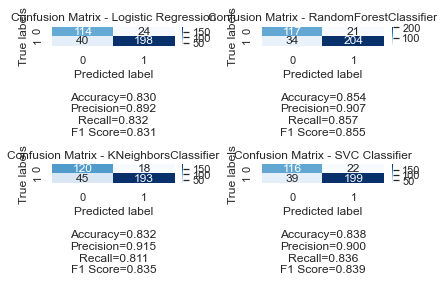

In [52]:
#plt.subplots(221, figsize=(8,6))
fig = plt.figure()
sns.set(rc = {'figure.figsize':(8,8)})
plt.subplot(2, 2, 1)
plt.title('Confusion Matrix - Logistic Regression')
cm=confusion_matrix(y_test,yhat_model[0])
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');
plt.ylabel('True labels')

accuracy = accuracy_score(y_test, yhat_model[0])
precision = precision_score(y_test,yhat_model[0])
recall    = recall_score(y_test,yhat_model[0])
f1score  = f1_score(y_test, yhat_model[0],average="weighted", pos_label=1)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)

plt.xlabel('Predicted label' + stats_text)



plt.subplot(2, 2, 2)
plt.title('Confusion Matrix - RandomForestClassifier')
cm=confusion_matrix(y_test,yhat_model[2])
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

accuracy = accuracy_score(y_test, yhat_model[2])
precision = precision_score(y_test,yhat_model[2])
recall    = recall_score(y_test,yhat_model[2])
f1score  = f1_score(y_test, yhat_model[2],average="weighted", pos_label=1)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)
plt.xlabel('Predicted label' + stats_text)


plt.subplot(2, 2, 3)
plt.title('Confusion Matrix - KNeighborsClassifier')
cm=confusion_matrix(y_test,yhat_model[3])
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

accuracy = accuracy_score(y_test, yhat_model[3])
precision = precision_score(y_test,yhat_model[3])
recall    = recall_score(y_test,yhat_model[3])
f1score  = f1_score(y_test, yhat_model[3],average="weighted", pos_label=1)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)
plt.xlabel('Predicted label' + stats_text)

plt.subplot(2, 2, 4)
plt.title('Confusion Matrix - SVC Classifier')
cm=confusion_matrix(y_test,yhat_model[1])
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

accuracy = accuracy_score(y_test, yhat_model[1])
precision = precision_score(y_test,yhat_model[1])
recall    = recall_score(y_test,yhat_model[1])
f1score  = f1_score(y_test, yhat_model[1],average="weighted", pos_label=1)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)
plt.xlabel('Predicted label' + stats_text)


fig.tight_layout()
plt.show()

The confusion matrices allow us to better visualise the true positives and the positive falses. In our dataset, the accuracy indicator is not the most relevant one, indeed the number of positive values (Number of drug_user) is largely superior to the number of negative values. On 1877 observations 1171 are considered as being a drug_user.The f1 score is the most relevant indicator in our case.   
F1 score :  
- Logistic Regression =>   0.831
- Random Forest       =>   0.844
- K Neighbors         =>   0.835
- SVC                 =>   0.839

### Grid search

#### Hyper parameters

We are going to use the GridSearchCV function to get a better model, it automates the search for an optimum among the hyperparameters, it uses in particular the cross validation.
First we define for each model the hyper parameters

In [53]:
param_grid_logreg = [
    
    {
     'penalty' : ['l1', 'l2'],
     'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
     'solver' : ['liblinear'],
     'class_weight': ['balanced']
    },
    
]


param_grid_SVC = [{'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}]

param_grid_KNN = [{
    'n_neighbors': list(range(1,30)),
    'weights': ['uniform','distance'],
    'metric':['euclidean','manhattan']
}]

param_grid_RandomForest = [{
    'max_depth' : [2, 4, 8, 16, 36, 64],
    'n_estimators' :[64, 128, 256], 
    'class_weight': ['balanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }]

param=[{'class_weight': ['balanced'], 'criterion': ['gini'], 'max_depth': [16], 'max_features': ['auto'], 'n_estimators': [128]}]




#### Model Fitting using GridSearchCV

In [54]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
def gridSearch(model,param_grid_model,X_train,y_train,X_test):
    scv = StratifiedKFold(n_splits=5)

    model_Grid = GridSearchCV(model, param_grid = param_grid_model, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)

    best_model_Grid = model_Grid.fit(X_train, y_train)

    

    print("Best score : \n", best_model_Grid.best_score_)

    print("Best parameters :\n", best_model_Grid.best_params_)
    
    yhat_model = best_model_Grid.predict(X_test)
    acc = accuracy_score(y_test, yhat_model)
    f1 = f1_score(y_test, yhat_model,average="weighted", pos_label=1)
    print(' F1-Score: {:.5}'.format(f1))
    
    
    return yhat_model
    

#### Predictions 

We do a gridSearch for each model and we retrieve the predictions of each model optimised by the hyper parameters 

In [56]:
%%time
print("______LOGISTIC REGRESSION______")
yhat_grid_logreg=gridSearch(LogisticRegression(),param_grid_logreg,X_train,y_train,X_test)
print("______SVC______")
yhat_grid_svc=gridSearch(SVC(),param_grid_SVC,X_train,y_train,X_test)
print("______KNN______")
yhat_grid_KNN=gridSearch(KNeighborsClassifier(),param_grid_KNN,X_train,y_train,X_test)
print("______RANDOM FOREST______")
yhat_grid_RandomForest=gridSearch(RandomForestClassifier(),param_grid_RandomForest,X_train,y_train,X_test)
#randomForest takes time :(


______LOGISTIC REGRESSION______
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best score : 
 0.8439834617587707
Best parameters :
 {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
 F1-Score: 0.80926
______SVC______
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best score : 
 0.8639716224304694
Best parameters :
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
 F1-Score: 0.84217
______KNN______
Fitting 5 folds for each of 116 candidates, totalling 580 fits
Best score : 
 0.8494959542301407
Best parameters :
 {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}
 F1-Score: 0.83732
______RANDOM FOREST______
Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\jega_\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best score : 
 0.8630818822275999
Best parameters :
 {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 36, 'max_features': 'auto', 'n_estimators': 256}
 F1-Score: 0.85224
Wall time: 1min 12s


In [ ]:
yprob=LogisticRegression().pred

We check for each model the classification report 

In [ ]:
report = classification_report(y_test, yhat_grid_logreg,target_names=['No drugs','Drug user'])
print(report)

In [ ]:
report = classification_report(y_test, yhat_grid_svc,target_names=['No drugs','Drug user'])
print(report)

In [ ]:
report = classification_report(y_test, yhat_grid_KNN,target_names=['No drugs','Drug user'])
print(report)

In [ ]:
report = classification_report(y_test, yhat_grid_RandomForest,target_names=['No drugs','Drug user'])
print(report)

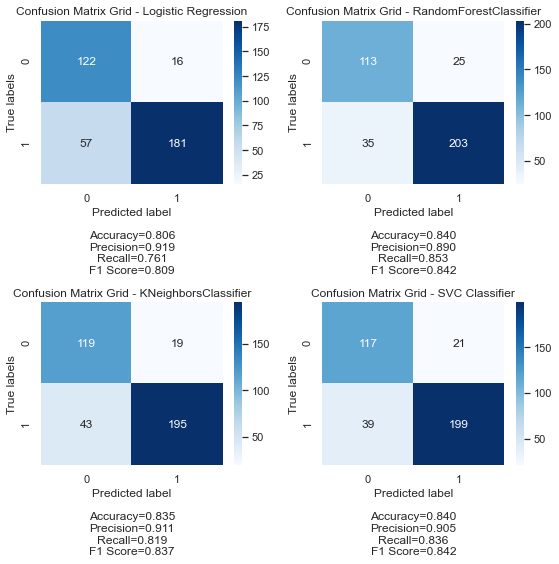

In [110]:
#plt.subplots(221, figsize=(8,6))
fig = plt.figure()
sns.set(rc = {'figure.figsize':(8,8)})
plt.subplot(2, 2, 1)
plt.title('Confusion Matrix Grid - Logistic Regression')
cm=confusion_matrix(y_test,yhat_grid_logreg)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');
plt.ylabel('True labels')

accuracy = accuracy_score(y_test, yhat_grid_logreg)
precision = precision_score(y_test,yhat_grid_logreg)
recall    = recall_score(y_test,yhat_grid_logreg)
f1score  = f1_score(y_test, yhat_grid_logreg,average="weighted", pos_label=1)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)

plt.xlabel('Predicted label' + stats_text)



plt.subplot(2, 2, 2)
plt.title('Confusion Matrix Grid - RandomForestClassifier') # a changer fit prend du temps
cm=confusion_matrix(y_test,yhat_grid_RandomForest)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

accuracy = accuracy_score(y_test,yhat_grid_RandomForest)
precision = precision_score(y_test,yhat_grid_RandomForest)
recall    = recall_score(y_test,yhat_grid_RandomForest)
f1score  = f1_score(y_test, yhat_grid_RandomForest,average="weighted", pos_label=1)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)
plt.xlabel('Predicted label' + stats_text)


plt.subplot(2, 2, 3)
plt.title('Confusion Matrix Grid - KNeighborsClassifier')
cm=confusion_matrix(y_test,yhat_grid_KNN)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

accuracy = accuracy_score(y_test, yhat_grid_KNN)
precision = precision_score(y_test,yhat_grid_KNN)
recall    = recall_score(y_test,yhat_grid_KNN)
f1score  = f1_score(y_test, yhat_grid_KNN,average="weighted", pos_label=1)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)
plt.xlabel('Predicted label' + stats_text)

plt.subplot(2, 2, 4)
plt.title('Confusion Matrix Grid - SVC Classifier')
cm=confusion_matrix(y_test,yhat_grid_svc)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues');
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

accuracy = accuracy_score(y_test,yhat_grid_svc)
precision = precision_score(y_test,yhat_grid_svc)
recall    = recall_score(y_test,yhat_grid_svc)
f1score  = f1_score(y_test, yhat_grid_svc,average="weighted", pos_label=1)
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1score)
plt.xlabel('Predicted label' + stats_text)


fig.tight_layout()
plt.show()

blabla confusion grid 

### Comparaison AUC Score and ROC curve 

#### AUC 

To compare our models we can use both AUC Score and ROC curve. AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. In our case, the Higher the AUC, the better the model is at distinguishing between drug users and non users


In [95]:
from sklearn.metrics import roc_curve, roc_auc_score

In [96]:
false_positive_rate_logreg, true_positive_rate_logreg, threshold_logreg = roc_curve(y_test, yhat_grid_logreg)
false_positive_rate_SVC, true_positive_rate_SVC, threshold_SVC = roc_curve(y_test, yhat_grid_svc)
false_positive_rate_KNN, true_positive_rate_KNN, threshold_KNN = roc_curve(y_test, yhat_grid_KNN)
false_positive_rate_RandomForest, true_positive_rate_RandomForest, threshold_RandomForest = roc_curve(y_test, yhat_grid_RandomForest)

In [97]:
print('ROC AUC Score for Logistic Regression : ', roc_auc_score(y_test, yhat_grid_logreg))
print('ROC AUC Score for RandomForestClassifier : ', roc_auc_score(y_test, yhat_grid_RandomForest))
print('ROC AUC Score for KNeighborsClassifier : ', roc_auc_score(y_test, yhat_grid_KNN))
print('ROC AUC Score for SVC Classifier : ', roc_auc_score(y_test, yhat_grid_svc))

ROC AUC Score for Logistic Regression :  0.8222810863475826
ROC AUC Score for RandomForestClassifier :  0.8358908780903667
ROC AUC Score for KNeighborsClassifier :  0.8408232858360736
ROC AUC Score for SVC Classifier :  0.8419802703690172


#### ROC curve 

ROC is a graph that shows the performance for a classification model at all unique thresholds. The graph uses the the following parameters on its axes:

- True Positive Rate : it's a synonym for recall. It is a ratio of the true positives to all positives. It ranges from 0 to 1. Thus, TPR can be thought of as a measure of how well the model is identifying the positive class.                       


- False Positive Rate : it's a measure of how often there are incorrect classifications of the positive class. In other words, when the actual class is negative, the FPR informs you how often the model misclassifies the class as positive.

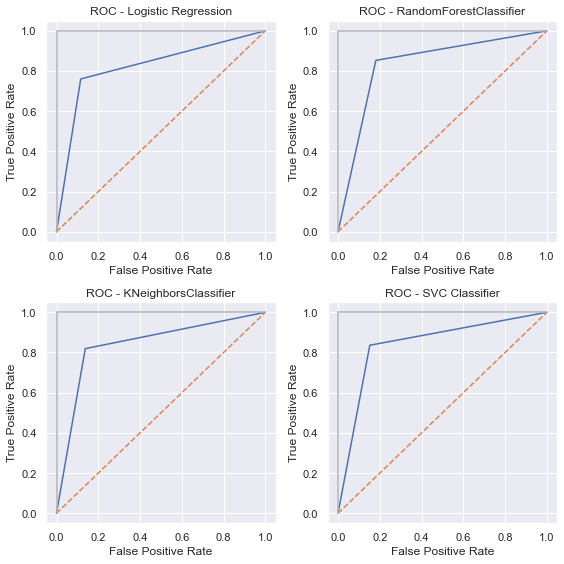

In [98]:
#plt.subplots(221, figsize=(8,6))
fig = plt.figure()
sns.set(rc = {'figure.figsize':(8,8)})
plt.subplot(2, 2, 1)
plt.title('ROC - Logistic Regression')
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 2)
plt.title('ROC - RandomForestClassifier')
plt.plot(false_positive_rate_RandomForest, true_positive_rate_RandomForest)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 3)
plt.title('ROC - KNeighborsClassifier')
plt.plot(false_positive_rate_KNN, true_positive_rate_KNN)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


plt.subplot(2, 2, 4)
plt.title('ROC - SVC Classifier')
plt.plot(false_positive_rate_SVC, true_positive_rate_SVC)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

fig.tight_layout()
plt.show()

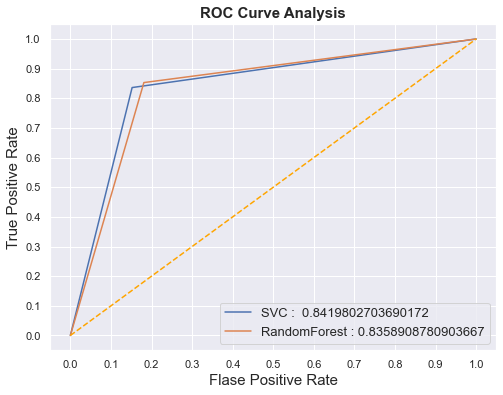

In [115]:
fig = plt.figure(figsize=(8,6))


plt.plot(false_positive_rate_SVC, 
         true_positive_rate_SVC,
        label= f"SVC :  {roc_auc_score(y_test, yhat_grid_svc)} ")

plt.plot(false_positive_rate_RandomForest, 
         true_positive_rate_RandomForest,
        label= f"RandomForest : {roc_auc_score(y_test, yhat_grid_RandomForest)}")        
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

The F1 score is pretty close for SVC and Random forest, but as we plot the roc curve and auc score, we can see that the svc model has a better auc score. Therefore, SVC model is the best at at distinguishing between drug users and non users.

### 2nd Model : Predicting the drugs used

Our first model predicts drug use. In practice, it would be more interesting to predict exactly the type of drug used according to the personality. This is a multiclassification problem that we will break down into several independent binary classifications.   
The rest of the study is just a reflection to improve the accuracy of the model, in order to obtain the exact type of drug that can be consumed.

In [96]:
df_ml=df_ml.drop("Drug_user",axis=1)

In [97]:
df_ml['No_drugs']=np.where(df_ml.loc[:,drugs_illegal].sum(axis=1)==0, 1, 0)
df_ml

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Amphet,Amyl,Benzos,Canabis,Coke,Crake,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA,No_drugs
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0


In [98]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, f1_score, precision_score, recall_score, make_scorer



In [99]:
classifiers = [KNeighborsClassifier(),
    SVC(),
    LogisticRegression(),
    RandomForestClassifier(),   
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis()]
classifiers_name=['KNeighborsClassifier',
    'SVC',
    'Logisitic Regression',
    'RandomForestClassifier',
    'AdaBoostClassifier',
    'GaussianNB',
    'LinearDiscriminantAnalysis']

In [118]:
features=['Age', 'Gender', 'Education', 'Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']

In [116]:
targets=[]
drugs_illegal
targets=drugs_illegal+["No_drugs"]


We are in the case of a multiclassification problem, we use the One vs Rest method which is a heuristic method for using binary classification algorithms for multi-class classification. It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

In [103]:
OvR_classifiers = [OneVsRestClassifier(classifier, n_jobs=-1) for classifier in classifiers]

In [104]:
df_ml_train, df_ml_test = train_test_split(df_ml, test_size=0.2, random_state=11)

In [106]:
def classifier_comparison(classifiers, data,data_test, features, targets):
    tuned = []
    yhat_model=[]
    for (classifier,name) in zip(classifiers,classifiers_name):
        clf = classifier
        
        
        clf.fit(data[features], data[targets])
        tuned.append(clf)
        yhat=clf.predict(data_test[features])
        yhat_model.append(yhat)
        
        print("____________"+name+"____________")    
        report = classification_report(data_test[targets], yhat,target_names=targets,zero_division=0)
        
       
        print(report)
        
    return tuned,yhat

In [113]:
model,yhat_model=classifier_comparison(OvR_classifiers,df_ml_train,df_ml_test,features,targets)

____________KNeighborsClassifier____________
              precision    recall  f1-score   support

      Amphet       0.51      0.29      0.37        94
        Amyl       0.50      0.04      0.07        26
      Benzos       0.60      0.35      0.44       122
     Canabis       0.84      0.80      0.82       205
        Coke       0.62      0.31      0.41       101
       Crake       0.00      0.00      0.00        21
     Ecstasy       0.61      0.51      0.55       110
      Heroin       0.00      0.00      0.00        31
    Ketamine       0.29      0.10      0.15        41
      Legalh       0.57      0.45      0.50       126
         LSD       0.47      0.51      0.49        71
        Meth       0.45      0.19      0.27        68
   Mushrooms       0.55      0.58      0.56        88
         VSA       0.00      0.00      0.00        13
    No_drugs       0.71      0.80      0.76       133

   micro avg       0.63      0.47      0.54      1250
   macro avg       0.45      0.33  

We can observe that the average f1 score is not very high but when we look at specific drugs categories such as cannabis or the no_drugs catergory the precision and the f1 score is pretty high. Ce résultat est majoritairement dû au taux de support pour chaque drogue. Une drogue faiblement consommée tel que le crack ou l'heroine ne nous fournit pas de données suffisantes pour établir un modèle. 

### Grid Search 

We cannot build a model on all drugs due to the amount of data. In order to keep a reliable model, we will select the drugs with a sufficient confidence score:
- Benzos
- Cannabis
- Coke
- Ecstasy
- LegalHLSD
- mushrooms 
- no drugs 

In [119]:
drugs_kept=['Benzos','Canabis','Coke','Ecstasy','Legalh','LSD','Mushrooms','No_drugs']
df_ml_grid_columns=features+drugs_kept


In [115]:
df_ml_grid=df_ml.loc[:,df_ml_grid_columns]
df_ml_grid

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Benzos,Canabis,Coke,Ecstasy,Legalh,LSD,Mushrooms,No_drugs
ID,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0,0,0,0,0,1
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,1,1,0,0,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,1,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,0,0,0,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,1,0,0,1,1,0,0
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,1,0,0,1,1,1,0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1,1,1,1,0,0,0,0


#### Split the data 

In [116]:
df_ml_grid_train, df_ml_grid_test = train_test_split(df_ml_grid, test_size=0.2, random_state=11)

#### Hyper parameters

In [117]:
prefix = "estimator__"

grid_boost = {prefix+'n_estimators': [20, 30, 40, 50], prefix+'learning_rate': [0.1, 0.25, 0.5, 1.0]}
grid_gaussian = {prefix+'var_smoothing': np.logspace(1, -9, num=20)}



grids = [
    grid_boost,
    grid_gaussian,
]

In [118]:
classifiers = [   
    AdaBoostClassifier(),
    GaussianNB(),
]
classifiers_name=[
    'AdaBoostClassifier',
    'GaussianNB',
]

In [119]:
OvR_classifiers = [OneVsRestClassifier(classifier, n_jobs=-1) for classifier in classifiers]

#### Fitting the models

In [126]:
def classifier_comparison_grid(classifiers,grids, data,data_test, features, targets):
    tuned = []
    
    for (classifier,grid,name) in zip(classifiers,grids,classifiers_name):
        clf = GridSearchCV(classifier,grid,scoring='f1_samples')
        
        
        clf.fit(data[features], data[targets])
        tuned.append(clf)
        print("____________"+name+"____________")
        print("Best score : \n", clf.best_score_)
        print("Best parameters :\n", clf.best_params_)
        
            
     
       
        
    return tuned

In [127]:
%%time
results=classifier_comparison_grid(OvR_classifiers,grids,df_ml_grid_train,df_ml_grid_test,features,drugs_kept)

C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anacond

C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anacond

____________AdaBoostClassifier____________
Best score : 
 0.5952252393601231
Best parameters :
 {'estimator__learning_rate': 0.5, 'estimator__n_estimators': 50}


C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anacond

C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anacond

C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1599: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jega_\anacond

____________GaussianNB____________
Best score : 
 0.6211441566677447
Best parameters :
 {'estimator__var_smoothing': 0.0069519279617756054}
Wall time: 20.3 s


### Predictions 

In [128]:
yhat_boost=results[0].predict(df_ml_grid_test[features])
yhat_Gaussian=results[1].predict(df_ml_grid_test[features])
yhat_model=[]
yhat_model.append(yhat_boost)
yhat_model.append(yhat_Gaussian)

### Models report

In [139]:

print('           MODELS REPORT IN DETAILS                ')
for name, model in zip(classifiers_name,yhat_model):
    print('____________'+name+'____________')

    report = classification_report(df_ml_grid_test[drugs_kept],model,target_names=drugs_kept)
    print(report)
    #plot_confusion_matrix(y_test,yhat)

           MODELS REPORT IN DETAILS                
____________AdaBoostClassifier____________
              precision    recall  f1-score   support

      Benzos       0.66      0.34      0.45       122
     Canabis       0.85      0.80      0.82       205
        Coke       0.65      0.28      0.39       101
     Ecstasy       0.58      0.45      0.51       110
      Legalh       0.68      0.50      0.58       126
         LSD       0.58      0.61      0.59        71
   Mushrooms       0.56      0.51      0.54        88
    No_drugs       0.76      0.84      0.80       133

   micro avg       0.70      0.57      0.63       956
   macro avg       0.67      0.54      0.58       956
weighted avg       0.69      0.57      0.61       956
 samples avg       0.64      0.61      0.59       956

____________GaussianNB____________
              precision    recall  f1-score   support

      Benzos       0.57      0.58      0.58       122
     Canabis       0.87      0.80      0.83       205
  

C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jega_\anaconda3\lib\site-packages\sklearn\metrics\_cla

## Conclusion

The dataset was a little hard to interpret, the correlation between features and the target is weak. Moreover the fact that we had legal and illegal drugs at the same time did not help, like chocolate, That is way we decided to concentrate our model on illegal drugs. Other drugs were difficult to analyse because of the differents legislation and mores regarding drugs in the country.

We manage to find the best way to make prediction with those features combine, by redefining the target and changing the goal to a binary classification problem. We saw that we have a more or less balanced distribution thanks to the suppression of the legal drugs that mislead the score increases the number of positive cases. After seeing those good result on our binary classification problem, we have decided to begin on working on multi-classification. But unfortunately, we had a problem with the low number of supports for some underused drugs, that resulted in a weak score. We wanted to go further, one of our lines of thought was oversampling on the various minority drugs, but it is possible that this leads to overfitting.

This project was a great way to dive in data analysis and get familiar with python tools such as pandas, seaborn, matplotlib, numpy. This also was an opportunity to work on multilabel data (several target variables that are not mutually exclusive).

## References
    
* [Janany's github](https://github.com/IIJanaII)
* [Ilies's github](https://github.com/iliesg)
* [Full dataset description](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29)
* https://fr.wikipedia.org/wiki/Mod%C3%A8le_des_Big_Five_(psychologie)